In [83]:
from joblib import load
from matplotlib import pyplot as plt
import numpy as np
from palettable.cartocolors.sequential import agSunset_4

plt.style.use("publication")

In [2]:
model = load("../../models/pca_analysis_model.pkl")

/home/kelvin/anaconda3/envs/rdkit/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/kelvin/anaconda3/envs/rdkit/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/kelvin/anaconda3/envs/rdkit/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/kelvin/anaconda3/envs/rdkit/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/kelvin/anaconda3/envs/rdkit/lib/python3.6/importlib/_bootstrap.py:

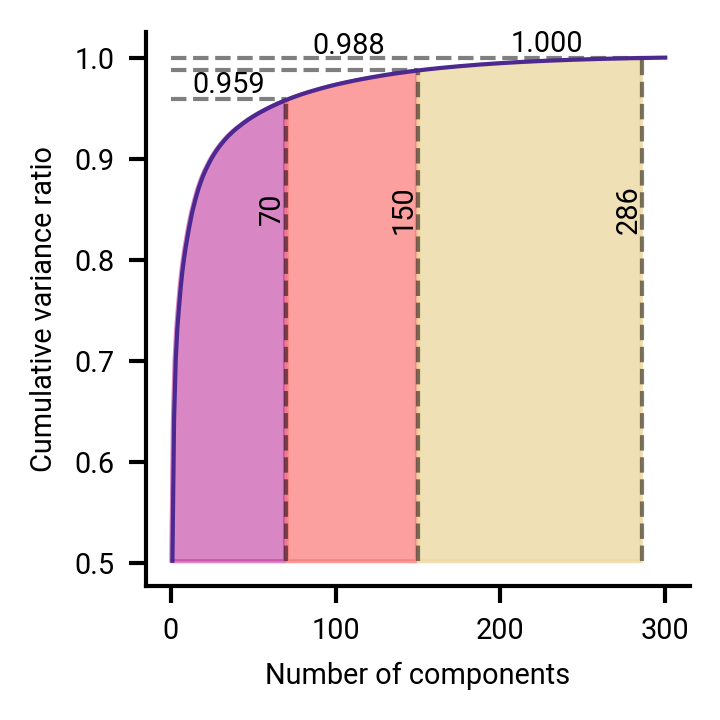

In [91]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))

cumulative = np.cumsum(model.explained_variance_ratio_)

twosigma = 70
twohalfsigma = np.argmin(np.abs(cumulative - 0.98758))
threesigma = np.argmin(np.abs(cumulative - 0.9997))

colors = agSunset_4.hex_colors

ax.plot(np.arange(1, 301), cumulative, color=colors[0])
ax.fill_between(np.arange(70), cumulative[:twosigma], cumulative.min(), color=colors[1], alpha=0.6)
ax.fill_between(np.arange(70, twohalfsigma), cumulative[twosigma:twohalfsigma], cumulative.min(), color=colors[2], alpha=0.7)
ax.fill_between(np.arange(twohalfsigma, threesigma), cumulative[twohalfsigma:threesigma], cumulative.min(), color=colors[3], alpha=0.8)

ax.text(35, cumulative[70], f"{cumulative[70]:.3}", fontsize="x-small", ha="center", va="bottom")
ax.text(70, 0.85, 70, fontsize="x-small", ha="right", va="center", rotation=90)
ax.hlines(cumulative[70], 0., 70, ls="--", alpha=0.5)
ax.vlines(70, cumulative.min(), cumulative[70], ls="--", alpha=0.5)

ax.text(130, cumulative[twohalfsigma] + 0.01, f"{cumulative[twohalfsigma]:.3f}", fontsize="x-small", ha="right", va="bottom")
ax.text(twohalfsigma, 0.85, twohalfsigma, fontsize="x-small", ha="right", va="center", rotation=90)
ax.hlines(cumulative[twohalfsigma], 0., twohalfsigma, ls="--", alpha=0.5)
ax.vlines(twohalfsigma, cumulative.min(), cumulative[twohalfsigma], ls="--", alpha=0.5)

ax.text(250, cumulative[threesigma], f"{cumulative[threesigma]:.3f}", fontsize="x-small", ha="right", va="bottom")
ax.text(threesigma, 0.85, threesigma, fontsize="x-small", ha="right", va="center", rotation=90)
ax.hlines(cumulative[threesigma], 0., threesigma, ls="--", alpha=0.5)
ax.vlines(threesigma, cumulative.min(), cumulative[threesigma], ls="--", alpha=0.5)

ax.set(xlabel="Number of components", ylabel="Cumulative variance ratio")
fig.savefig("../../reports/figures/pca_variance.pdf", dpi=300)